In [1]:
SensorNum=1 # Sensor number
WindowWidth=[128,256,512,1024,2048,4096] # Window Width
OverlapArray=[16,16,16,16,16,16] #liding window
#width=1000 # graph width 
#EncodingDim=[4,8,12,16,32,64] # number of hidden layer note
encoding_dim=32
Axis='AccY' # Axis

WORKSPACE_PATH = "/media/takeyama/HD-PZU3/01_TAKEYAMA_WORKSPACE/02_CommonData"
DATE_PATH="/2016-08-15/"
TITLE_PATH="Optim/"

In [2]:
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy import signal
import time
import os
import matplotlib.pyplot as plt
import pylab
import pickle
import copy

import processing
import window

import matplotlib.animation as animation
import datetime

%matplotlib inline

In [3]:
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import SGD, Adadelta, Adagrad, Adam, Adamax, RMSprop, Nadam
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils.visualize_util import model_to_dot, plot
from keras import backend as K
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping

import matplotlib.image as mpimg


Using Theano backend.
Using gpu device 0: GeForce GTX 1080 (CNMeM is disabled, cuDNN 5005)


In [4]:
DataName='sensor'+str(SensorNum)+'_'+Axis
SensorName='sensor'+str(SensorNum)
DicName='MemSensor'+str(SensorNum)

In [5]:
# define rawdata directory
if not os.path.exists(WORKSPACE_PATH+"/raw/"):
    os.makedirs(WORKSPACE_PATH+"/raw/")
RawDataPath=WORKSPACE_PATH+"/raw/"

# define restoring windowdata directory
if not os.path.exists(WORKSPACE_PATH+'/window/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+'/window/'+TITLE_PATH+DataName+'/')
WindowDataPath=WORKSPACE_PATH+'/window/'+TITLE_PATH+DataName+'/'

# define restoring netowrk model picture's directory
if not os.path.exists(WORKSPACE_PATH+DATE_PATH+'/modelPic/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+DATE_PATH+'/modelPic/'+TITLE_PATH+DataName+'/')
StudyDataModelPicPath=WORKSPACE_PATH+DATE_PATH+'/modelPic/'+TITLE_PATH+DataName+'/'

# define restoring graph data's directory
if not os.path.exists(WORKSPACE_PATH+DATE_PATH+'/graph/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+DATE_PATH+'/graph/'+TITLE_PATH+DataName+'/')
GlaphDataPath=WORKSPACE_PATH+DATE_PATH+'/graph/'+TITLE_PATH+DataName+'/'

# define restoring model paarmeter directory
if not os.path.exists(WORKSPACE_PATH+DATE_PATH+'/study/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+DATE_PATH+'/study/'+TITLE_PATH+DataName+'/')
StudyDataPath=WORKSPACE_PATH+DATE_PATH+'/study/'+TITLE_PATH+DataName+'/'

**Phase1 計測データの取得**

In [6]:
dic=processing.LoadDicDataFromFileNPZ(RawDataPath+DicName)

**Phase2 window flame 作成 & Learning**

In [7]:
optimizers = [SGD, Adadelta, Adamax, Adam, Adagrad,  RMSprop, Nadam]
optimArray = ["SGD", "Adadelta","Adamax", "Adam", "Adagrad",  "RMSprop", "Nadam"]

AccY is registed now
Build Complete
(254742,)
windowData's num =15914
SourceData's aborting data = 6
window shape is (15914, 128, 1)
hiden node = 32
-edim=32-Window=128-Overlap=16-SGD
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
1s - loss: 0.2053 - val_loss: 0.1150
Epoch 2/50
0s - loss: 0.0752 - val_loss: 0.0493
Epoch 3/50
1s - loss: 0.0391 - val_loss: 0.0326
Epoch 4/50
1s - loss: 0.0295 - val_loss: 0.0272
Epoch 5/50
1s - loss: 0.0257 - val_loss: 0.0244
Epoch 6/50
1s - loss: 0.0234 - val_loss: 0.0225
Epoch 7/50
1s - loss: 0.0218 - val_loss: 0.0211
Epoch 8/50
1s - loss: 0.0205 - val_loss: 0.0200
Epoch 9/50
1s - loss: 0.0195 - val_loss: 0.0191
Epoch 10/50
1s - loss: 0.0187 - val_loss: 0.0183
Epoch 11/50
1s - loss: 0.0180 - val_loss: 0.0177
Epoch 12/50
1s - loss: 0.0174 - val_loss: 0.0171
Epoch 13/50
1s - loss: 0.0168 - val_loss: 0.0166
Epoch 14/50
1s - loss: 0.0164 - val_loss: 0.0161
Epoch 15/50
1s - loss: 0.0159 - val_loss: 0.0157
Epoch 16/50
1s - loss: 0.0155 - val_loss

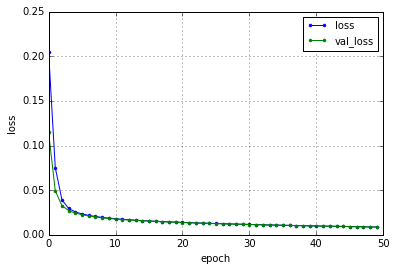

hiden node = 32
-edim=32-Window=128-Overlap=16-Adadelta
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
1s - loss: 0.0408 - val_loss: 0.0092
Epoch 2/50
1s - loss: 0.0066 - val_loss: 0.0050
Epoch 3/50
1s - loss: 0.0044 - val_loss: 0.0038
Epoch 4/50
1s - loss: 0.0034 - val_loss: 0.0027
Epoch 5/50
1s - loss: 0.0028 - val_loss: 0.0029
Epoch 6/50
1s - loss: 0.0024 - val_loss: 0.0021
Epoch 7/50
1s - loss: 0.0022 - val_loss: 0.0024
Epoch 8/50
1s - loss: 0.0020 - val_loss: 0.0035
Epoch 9/50
1s - loss: 0.0018 - val_loss: 0.0014
Epoch 10/50
1s - loss: 0.0017 - val_loss: 0.0018
Epoch 11/50
1s - loss: 0.0017 - val_loss: 0.0013
Epoch 12/50
1s - loss: 0.0016 - val_loss: 0.0012
Epoch 13/50
1s - loss: 0.0015 - val_loss: 0.0010
Epoch 14/50
1s - loss: 0.0014 - val_loss: 0.0011
Epoch 15/50
1s - loss: 0.0014 - val_loss: 0.0016
Epoch 16/50
1s - loss: 0.0013 - val_loss: 9.4239e-04
Epoch 17/50
1s - loss: 0.0013 - val_loss: 0.0012
Epoch 18/50
1s - loss: 0.0012 - val_loss: 8.3536e-04
Epoch 19/50
1

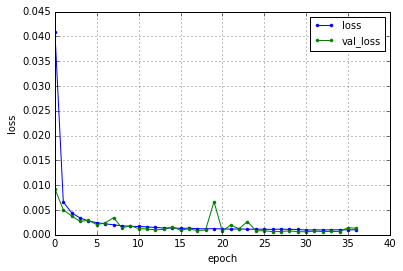

hiden node = 32
-edim=32-Window=128-Overlap=16-Adamax
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
1s - loss: 0.0207 - val_loss: 0.0070
Epoch 2/50
1s - loss: 0.0054 - val_loss: 0.0042
Epoch 3/50
1s - loss: 0.0034 - val_loss: 0.0027
Epoch 4/50
1s - loss: 0.0022 - val_loss: 0.0019
Epoch 5/50
1s - loss: 0.0015 - val_loss: 0.0014
Epoch 6/50
1s - loss: 0.0011 - val_loss: 7.7646e-04
Epoch 7/50
1s - loss: 7.7940e-04 - val_loss: 6.1076e-04
Epoch 8/50
1s - loss: 6.5713e-04 - val_loss: 5.6072e-04
Epoch 9/50
1s - loss: 5.7281e-04 - val_loss: 4.5454e-04
Epoch 10/50
1s - loss: 5.2599e-04 - val_loss: 5.2977e-04
Epoch 11/50
1s - loss: 4.2405e-04 - val_loss: 3.5232e-04
Epoch 12/50
1s - loss: 3.8741e-04 - val_loss: 3.5454e-04
Epoch 13/50
1s - loss: 3.6962e-04 - val_loss: 8.4137e-04
Epoch 14/50
1s - loss: 3.4452e-04 - val_loss: 3.2997e-04
Epoch 15/50
1s - loss: 2.9319e-04 - val_loss: 2.2865e-04
Epoch 16/50
1s - loss: 3.1912e-04 - val_loss: 2.6570e-04
Epoch 17/50
1s - loss: 2.6560e-04 - v

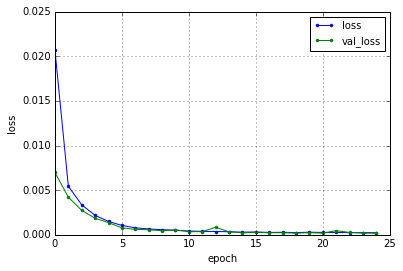

hiden node = 32
-edim=32-Window=128-Overlap=16-Adam
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
1s - loss: 0.0226 - val_loss: 0.0068
Epoch 2/50
1s - loss: 0.0038 - val_loss: 0.0025
Epoch 3/50
1s - loss: 0.0021 - val_loss: 0.0015
Epoch 4/50
1s - loss: 0.0014 - val_loss: 0.0013
Epoch 5/50
1s - loss: 0.0011 - val_loss: 7.3414e-04
Epoch 6/50
1s - loss: 8.3385e-04 - val_loss: 6.1140e-04
Epoch 7/50
1s - loss: 6.9144e-04 - val_loss: 6.2585e-04
Epoch 8/50
1s - loss: 6.2249e-04 - val_loss: 5.1321e-04
Epoch 9/50
1s - loss: 6.1896e-04 - val_loss: 9.0545e-04
Epoch 10/50
1s - loss: 5.0843e-04 - val_loss: 3.5310e-04
Epoch 11/50
1s - loss: 4.7917e-04 - val_loss: 3.4072e-04
Epoch 12/50
1s - loss: 4.4534e-04 - val_loss: 6.8715e-04
Epoch 13/50
1s - loss: 3.6140e-04 - val_loss: 3.0772e-04
Epoch 14/50
1s - loss: 3.6654e-04 - val_loss: 4.3919e-04
Epoch 15/50
1s - loss: 4.3293e-04 - val_loss: 2.5636e-04
Epoch 16/50
1s - loss: 3.4047e-04 - val_loss: 2.6383e-04
Epoch 17/50
1s - loss: 4.1481e-

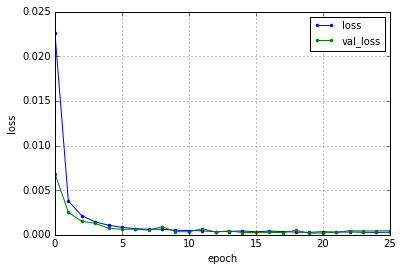

hiden node = 32
-edim=32-Window=128-Overlap=16-Adagrad
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
1s - loss: 0.0123 - val_loss: 0.0081
Epoch 2/50
1s - loss: 0.0045 - val_loss: 0.0037
Epoch 3/50
1s - loss: 0.0032 - val_loss: 0.0027
Epoch 4/50
1s - loss: 0.0026 - val_loss: 0.0023
Epoch 5/50
1s - loss: 0.0022 - val_loss: 0.0019
Epoch 6/50
1s - loss: 0.0018 - val_loss: 0.0016
Epoch 7/50
1s - loss: 0.0016 - val_loss: 0.0015
Epoch 8/50
1s - loss: 0.0014 - val_loss: 0.0021
Epoch 9/50
1s - loss: 0.0013 - val_loss: 0.0012
Epoch 10/50
1s - loss: 0.0012 - val_loss: 0.0013
Epoch 11/50
1s - loss: 0.0011 - val_loss: 9.9258e-04
Epoch 12/50
1s - loss: 0.0010 - val_loss: 0.0024
Epoch 13/50
1s - loss: 9.8228e-04 - val_loss: 9.0360e-04
Epoch 14/50
1s - loss: 9.3229e-04 - val_loss: 9.6434e-04
Epoch 15/50
1s - loss: 8.8222e-04 - val_loss: 8.6350e-04
Epoch 16/50
1s - loss: 8.4872e-04 - val_loss: 7.6067e-04
Epoch 17/50
1s - loss: 8.1182e-04 - val_loss: 7.4481e-04
Epoch 18/50
1s - loss: 7.80

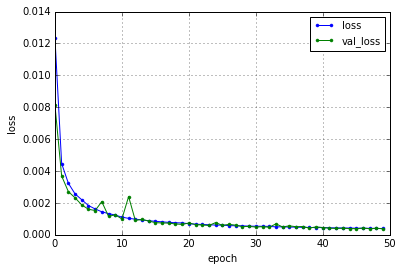

hiden node = 32
-edim=32-Window=128-Overlap=16-RMSprop
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
1s - loss: 0.0162 - val_loss: 0.0050
Epoch 2/50
1s - loss: 0.0050 - val_loss: 0.0167
Epoch 3/50
2s - loss: 0.0040 - val_loss: 0.0039
Epoch 4/50
1s - loss: 0.0036 - val_loss: 0.0027
Epoch 5/50
2s - loss: 0.0033 - val_loss: 0.0026
Epoch 6/50
1s - loss: 0.0031 - val_loss: 0.0015
Epoch 7/50
1s - loss: 0.0030 - val_loss: 0.0044
Epoch 8/50
1s - loss: 0.0029 - val_loss: 0.0048
Epoch 9/50
2s - loss: 0.0028 - val_loss: 0.0038
Epoch 10/50
1s - loss: 0.0028 - val_loss: 0.0011
Epoch 11/50
2s - loss: 0.0027 - val_loss: 0.0019
Epoch 12/50
2s - loss: 0.0027 - val_loss: 0.0028
Epoch 13/50
1s - loss: 0.0026 - val_loss: 0.0016
Epoch 14/50
1s - loss: 0.0025 - val_loss: 0.0104
Epoch 15/50
2s - loss: 0.0025 - val_loss: 0.0047
Epoch 16/50
2s - loss: 0.0025 - val_loss: 0.0014


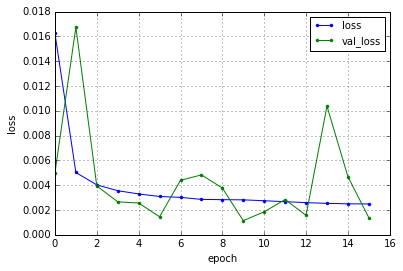

hiden node = 32
-edim=32-Window=128-Overlap=16-Nadam
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
1s - loss: 0.0173 - val_loss: 0.0078
Epoch 2/50
2s - loss: 0.0052 - val_loss: 0.0091
Epoch 3/50
2s - loss: 0.0035 - val_loss: 0.0017
Epoch 4/50
2s - loss: 0.0030 - val_loss: 0.0015
Epoch 5/50
2s - loss: 0.0026 - val_loss: 0.0013
Epoch 6/50
2s - loss: 0.0023 - val_loss: 0.0012
Epoch 7/50
2s - loss: 0.0020 - val_loss: 0.0014
Epoch 8/50
1s - loss: 0.0019 - val_loss: 0.0082
Epoch 9/50
1s - loss: 0.0020 - val_loss: 0.0013
Epoch 10/50
2s - loss: 0.0015 - val_loss: 7.1778e-04
Epoch 11/50
2s - loss: 0.0015 - val_loss: 0.0027
Epoch 12/50
2s - loss: 0.0015 - val_loss: 7.2999e-04
Epoch 13/50
2s - loss: 0.0015 - val_loss: 0.0062
Epoch 14/50
2s - loss: 0.0015 - val_loss: 0.0010
Epoch 15/50
2s - loss: 0.0011 - val_loss: 0.0021
Epoch 16/50
2s - loss: 0.0011 - val_loss: 4.8539e-04
Epoch 17/50
2s - loss: 0.0012 - val_loss: 0.0017
Epoch 18/50
2s - loss: 0.0011 - val_loss: 5.2864e-04
Epoch 19

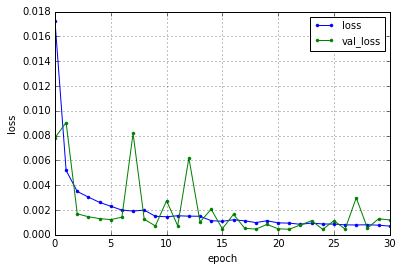

AccY is registed now
Build Complete
(254742,)
windowData's num =15906
SourceData's aborting data = 6
window shape is (15906, 256, 1)
hiden node = 32
-edim=32-Window=256-Overlap=16-SGD
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
1s - loss: 0.2457 - val_loss: 0.1872
Epoch 2/50
1s - loss: 0.1436 - val_loss: 0.1070
Epoch 3/50
1s - loss: 0.0846 - val_loss: 0.0673
Epoch 4/50
1s - loss: 0.0576 - val_loss: 0.0501
Epoch 5/50
1s - loss: 0.0456 - val_loss: 0.0418
Epoch 6/50
1s - loss: 0.0392 - val_loss: 0.0369
Epoch 7/50
1s - loss: 0.0352 - val_loss: 0.0337
Epoch 8/50
1s - loss: 0.0326 - val_loss: 0.0315
Epoch 9/50
1s - loss: 0.0307 - val_loss: 0.0299
Epoch 10/50
1s - loss: 0.0292 - val_loss: 0.0286
Epoch 11/50
1s - loss: 0.0281 - val_loss: 0.0276
Epoch 12/50
1s - loss: 0.0271 - val_loss: 0.0267
Epoch 13/50
1s - loss: 0.0264 - val_loss: 0.0260
Epoch 14/50
1s - loss: 0.0257 - val_loss: 0.0254
Epoch 15/50
1s - loss: 0.0252 - val_loss: 0.0249
Epoch 16/50
1s - loss: 0.0247 - val_loss

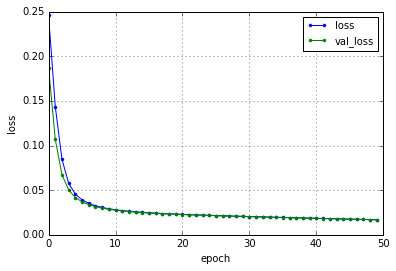

hiden node = 32
-edim=32-Window=256-Overlap=16-Adadelta
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
2s - loss: 0.0445 - val_loss: 0.0198
Epoch 2/50
2s - loss: 0.0111 - val_loss: 0.0096
Epoch 3/50
1s - loss: 0.0086 - val_loss: 0.0083
Epoch 4/50
1s - loss: 0.0073 - val_loss: 0.0104
Epoch 5/50
2s - loss: 0.0065 - val_loss: 0.0057
Epoch 6/50
2s - loss: 0.0060 - val_loss: 0.0050
Epoch 7/50
2s - loss: 0.0054 - val_loss: 0.0050
Epoch 8/50
2s - loss: 0.0050 - val_loss: 0.0042
Epoch 9/50
2s - loss: 0.0047 - val_loss: 0.0049
Epoch 10/50
2s - loss: 0.0045 - val_loss: 0.0040
Epoch 11/50
2s - loss: 0.0044 - val_loss: 0.0137
Epoch 12/50
2s - loss: 0.0040 - val_loss: 0.0032
Epoch 13/50
2s - loss: 0.0038 - val_loss: 0.0033
Epoch 14/50
2s - loss: 0.0039 - val_loss: 0.0031
Epoch 15/50
2s - loss: 0.0035 - val_loss: 0.0070
Epoch 16/50
2s - loss: 0.0036 - val_loss: 0.0050
Epoch 17/50
2s - loss: 0.0033 - val_loss: 0.0061
Epoch 18/50
2s - loss: 0.0032 - val_loss: 0.0030
Epoch 19/50
2s - loss

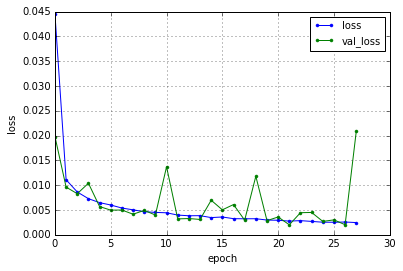

hiden node = 32
-edim=32-Window=256-Overlap=16-Adamax
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
1s - loss: 0.0252 - val_loss: 0.0105
Epoch 2/50
1s - loss: 0.0080 - val_loss: 0.0075
Epoch 3/50
1s - loss: 0.0051 - val_loss: 0.0041
Epoch 4/50
1s - loss: 0.0037 - val_loss: 0.0029
Epoch 5/50
1s - loss: 0.0026 - val_loss: 0.0022
Epoch 6/50
1s - loss: 0.0019 - val_loss: 0.0017
Epoch 7/50
1s - loss: 0.0014 - val_loss: 0.0011
Epoch 8/50
1s - loss: 9.8467e-04 - val_loss: 8.6101e-04
Epoch 9/50
1s - loss: 0.0011 - val_loss: 8.8566e-04
Epoch 10/50
1s - loss: 7.8270e-04 - val_loss: 0.0014
Epoch 11/50
1s - loss: 7.2255e-04 - val_loss: 0.0027
Epoch 12/50
1s - loss: 6.7335e-04 - val_loss: 6.7648e-04
Epoch 13/50
1s - loss: 6.1092e-04 - val_loss: 4.8937e-04
Epoch 14/50
1s - loss: 5.9185e-04 - val_loss: 5.9673e-04
Epoch 15/50
1s - loss: 5.5580e-04 - val_loss: 4.3854e-04
Epoch 16/50
1s - loss: 5.2881e-04 - val_loss: 8.4583e-04
Epoch 17/50
1s - loss: 6.1066e-04 - val_loss: 0.0024
Epoch 18

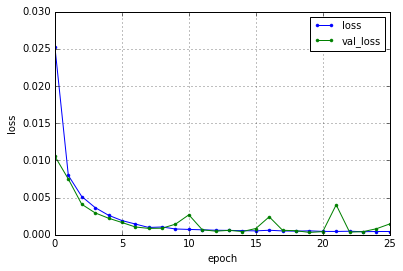

hiden node = 32
-edim=32-Window=256-Overlap=16-Adam
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
1s - loss: 0.0255 - val_loss: 0.0103
Epoch 2/50
1s - loss: 0.0060 - val_loss: 0.0077
Epoch 3/50
1s - loss: 0.0038 - val_loss: 0.0029
Epoch 4/50
1s - loss: 0.0028 - val_loss: 0.0054
Epoch 5/50
1s - loss: 0.0021 - val_loss: 0.0025
Epoch 6/50
1s - loss: 0.0015 - val_loss: 0.0016
Epoch 7/50
1s - loss: 0.0015 - val_loss: 0.0012
Epoch 8/50
1s - loss: 0.0010 - val_loss: 0.0037
Epoch 9/50
1s - loss: 0.0011 - val_loss: 7.8245e-04
Epoch 10/50
1s - loss: 7.7943e-04 - val_loss: 7.4303e-04
Epoch 11/50
1s - loss: 8.4335e-04 - val_loss: 5.7811e-04
Epoch 12/50
1s - loss: 8.8713e-04 - val_loss: 0.0024
Epoch 13/50
0s - loss: 8.9546e-04 - val_loss: 8.6130e-04
Epoch 14/50
0s - loss: 6.9567e-04 - val_loss: 5.4793e-04
Epoch 15/50
1s - loss: 6.6994e-04 - val_loss: 7.4762e-04
Epoch 16/50
1s - loss: 6.6610e-04 - val_loss: 0.0029
Epoch 17/50
1s - loss: 7.5936e-04 - val_loss: 0.0012
Epoch 18/50
1s - l

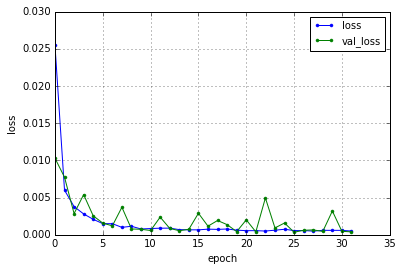

hiden node = 32
-edim=32-Window=256-Overlap=16-Adagrad
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
1s - loss: 0.0177 - val_loss: 0.0086
Epoch 2/50
1s - loss: 0.0078 - val_loss: 0.0073
Epoch 3/50
1s - loss: 0.0060 - val_loss: 0.0072
Epoch 4/50
1s - loss: 0.0052 - val_loss: 0.0060
Epoch 5/50
1s - loss: 0.0044 - val_loss: 0.0046
Epoch 6/50
1s - loss: 0.0040 - val_loss: 0.0131
Epoch 7/50
1s - loss: 0.0036 - val_loss: 0.0032
Epoch 8/50
1s - loss: 0.0031 - val_loss: 0.0037
Epoch 9/50
1s - loss: 0.0030 - val_loss: 0.0030
Epoch 10/50
1s - loss: 0.0027 - val_loss: 0.0030
Epoch 11/50
1s - loss: 0.0025 - val_loss: 0.0024
Epoch 12/50
1s - loss: 0.0024 - val_loss: 0.0077
Epoch 13/50
1s - loss: 0.0022 - val_loss: 0.0047
Epoch 14/50
1s - loss: 0.0022 - val_loss: 0.0020
Epoch 15/50
1s - loss: 0.0020 - val_loss: 0.0024
Epoch 16/50
1s - loss: 0.0019 - val_loss: 0.0017
Epoch 17/50
1s - loss: 0.0018 - val_loss: 0.0047
Epoch 18/50
1s - loss: 0.0017 - val_loss: 0.0024
Epoch 19/50
1s - loss:

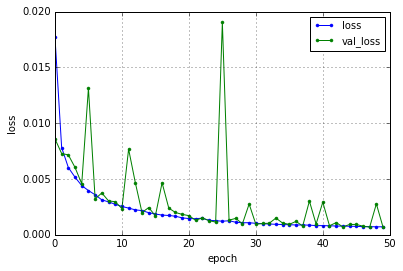

hiden node = 32
-edim=32-Window=256-Overlap=16-RMSprop
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
2s - loss: 0.0219 - val_loss: 0.0320
Epoch 2/50
2s - loss: 0.0094 - val_loss: 0.0053
Epoch 3/50
2s - loss: 0.0079 - val_loss: 0.0074
Epoch 4/50
2s - loss: 0.0070 - val_loss: 0.0237
Epoch 5/50
2s - loss: 0.0064 - val_loss: 0.0048
Epoch 6/50
2s - loss: 0.0060 - val_loss: 0.0100
Epoch 7/50
2s - loss: 0.0057 - val_loss: 0.0122
Epoch 8/50
2s - loss: 0.0054 - val_loss: 0.0059
Epoch 9/50
2s - loss: 0.0052 - val_loss: 0.0077
Epoch 10/50
1s - loss: 0.0051 - val_loss: 0.0083
Epoch 11/50
1s - loss: 0.0048 - val_loss: 0.0132


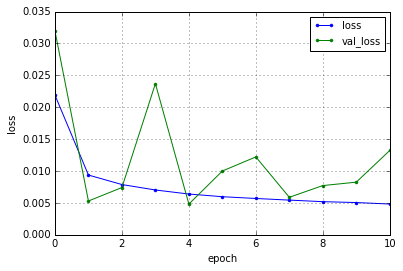

hiden node = 32
-edim=32-Window=256-Overlap=16-Nadam
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
2s - loss: 0.0210 - val_loss: 0.0083
Epoch 2/50
2s - loss: 0.0090 - val_loss: 0.0071
Epoch 3/50
2s - loss: 0.0069 - val_loss: 0.0094
Epoch 4/50
2s - loss: 0.0058 - val_loss: 0.0034
Epoch 5/50
2s - loss: 0.0048 - val_loss: 0.0027
Epoch 6/50
2s - loss: 0.0042 - val_loss: 0.0245
Epoch 7/50
1s - loss: 0.0038 - val_loss: 0.0050
Epoch 8/50
2s - loss: 0.0036 - val_loss: 0.0024
Epoch 9/50
2s - loss: 0.0033 - val_loss: 0.0648
Epoch 10/50
1s - loss: 0.0032 - val_loss: 0.0023
Epoch 11/50
1s - loss: 0.0030 - val_loss: 0.0033
Epoch 12/50
1s - loss: 0.0028 - val_loss: 0.0017
Epoch 13/50
1s - loss: 0.0027 - val_loss: 0.0214
Epoch 14/50
1s - loss: 0.0027 - val_loss: 0.0092
Epoch 15/50
1s - loss: 0.0024 - val_loss: 0.0014
Epoch 16/50
1s - loss: 0.0025 - val_loss: 0.0014
Epoch 17/50
1s - loss: 0.0024 - val_loss: 0.0013
Epoch 18/50
1s - loss: 0.0022 - val_loss: 0.0030
Epoch 19/50
1s - loss: 0

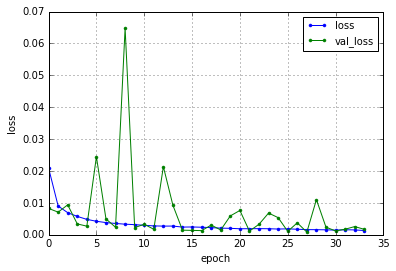

AccY is registed now
Build Complete
(254742,)
windowData's num =15890
SourceData's aborting data = 6
window shape is (15890, 512, 1)
hiden node = 32
-edim=32-Window=512-Overlap=16-SGD
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
1s - loss: 0.2770 - val_loss: 0.2428
Epoch 2/50
1s - loss: 0.2105 - val_loss: 0.1795
Epoch 3/50
1s - loss: 0.1539 - val_loss: 0.1312
Epoch 4/50
1s - loss: 0.1143 - val_loss: 0.0997
Epoch 5/50
1s - loss: 0.0892 - val_loss: 0.0802
Epoch 6/50
1s - loss: 0.0735 - val_loss: 0.0676
Epoch 7/50
1s - loss: 0.0631 - val_loss: 0.0591
Epoch 8/50
1s - loss: 0.0560 - val_loss: 0.0531
Epoch 9/50
1s - loss: 0.0508 - val_loss: 0.0487
Epoch 10/50
1s - loss: 0.0470 - val_loss: 0.0454
Epoch 11/50
1s - loss: 0.0441 - val_loss: 0.0429
Epoch 12/50
2s - loss: 0.0419 - val_loss: 0.0409
Epoch 13/50
2s - loss: 0.0401 - val_loss: 0.0393
Epoch 14/50
2s - loss: 0.0386 - val_loss: 0.0380
Epoch 15/50
2s - loss: 0.0374 - val_loss: 0.0369
Epoch 16/50
2s - loss: 0.0364 - val_loss

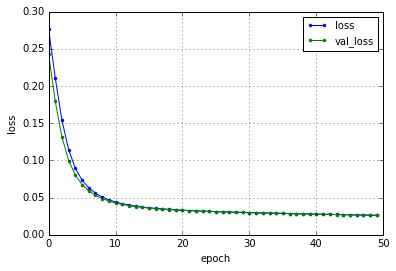

hiden node = 32
-edim=32-Window=512-Overlap=16-Adadelta
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
1s - loss: 0.0480 - val_loss: 0.0254
Epoch 2/50
1s - loss: 0.0189 - val_loss: 0.0176
Epoch 3/50
1s - loss: 0.0151 - val_loss: 0.0151
Epoch 4/50
1s - loss: 0.0131 - val_loss: 0.0109
Epoch 5/50
1s - loss: 0.0116 - val_loss: 0.0114
Epoch 6/50
1s - loss: 0.0110 - val_loss: 0.0158
Epoch 7/50
1s - loss: 0.0103 - val_loss: 0.0092
Epoch 8/50
1s - loss: 0.0098 - val_loss: 0.0083
Epoch 9/50
1s - loss: 0.0097 - val_loss: 0.0087
Epoch 10/50
1s - loss: 0.0090 - val_loss: 0.0074
Epoch 11/50
1s - loss: 0.0086 - val_loss: 0.0083
Epoch 12/50
1s - loss: 0.0084 - val_loss: 0.0082
Epoch 13/50
1s - loss: 0.0082 - val_loss: 0.0091
Epoch 14/50
1s - loss: 0.0078 - val_loss: 0.0061
Epoch 15/50
1s - loss: 0.0075 - val_loss: 0.0070
Epoch 16/50
1s - loss: 0.0075 - val_loss: 0.0086
Epoch 17/50
1s - loss: 0.0074 - val_loss: 0.0065
Epoch 18/50
1s - loss: 0.0069 - val_loss: 0.0086
Epoch 19/50
1s - loss

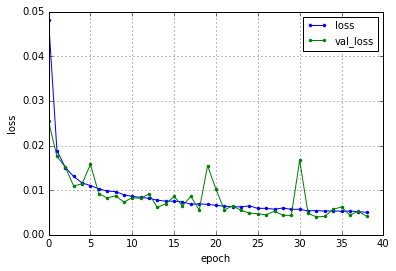

hiden node = 32
-edim=32-Window=512-Overlap=16-Adamax
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
1s - loss: 0.0270 - val_loss: 0.0127
Epoch 2/50
1s - loss: 0.0103 - val_loss: 0.0081
Epoch 3/50
1s - loss: 0.0073 - val_loss: 0.0059
Epoch 4/50
1s - loss: 0.0054 - val_loss: 0.0046
Epoch 5/50
1s - loss: 0.0045 - val_loss: 0.0044
Epoch 6/50
1s - loss: 0.0034 - val_loss: 0.0028
Epoch 7/50
1s - loss: 0.0029 - val_loss: 0.0024
Epoch 8/50
1s - loss: 0.0025 - val_loss: 0.0022
Epoch 9/50
1s - loss: 0.0022 - val_loss: 0.0017
Epoch 10/50
1s - loss: 0.0018 - val_loss: 0.0015
Epoch 11/50
1s - loss: 0.0017 - val_loss: 0.0016
Epoch 12/50
1s - loss: 0.0016 - val_loss: 0.0013
Epoch 13/50
1s - loss: 0.0015 - val_loss: 0.0033
Epoch 14/50
1s - loss: 0.0015 - val_loss: 0.0011
Epoch 15/50
1s - loss: 0.0015 - val_loss: 0.0011
Epoch 16/50
1s - loss: 0.0013 - val_loss: 0.0010
Epoch 17/50
1s - loss: 0.0013 - val_loss: 0.0011
Epoch 18/50
1s - loss: 0.0013 - val_loss: 0.0012
Epoch 19/50
1s - loss: 

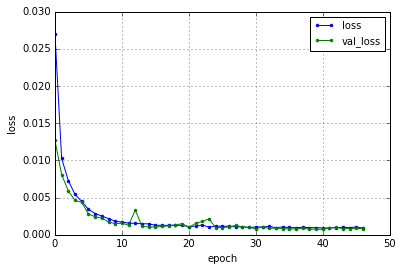

hiden node = 32
-edim=32-Window=512-Overlap=16-Adam
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
1s - loss: 0.0274 - val_loss: 0.0105
Epoch 2/50
1s - loss: 0.0084 - val_loss: 0.0062
Epoch 3/50
1s - loss: 0.0060 - val_loss: 0.0093
Epoch 4/50
1s - loss: 0.0046 - val_loss: 0.0036
Epoch 5/50
1s - loss: 0.0036 - val_loss: 0.0034
Epoch 6/50
1s - loss: 0.0037 - val_loss: 0.0037
Epoch 7/50
1s - loss: 0.0030 - val_loss: 0.0023
Epoch 8/50
1s - loss: 0.0032 - val_loss: 0.0026
Epoch 9/50
1s - loss: 0.0021 - val_loss: 0.0021
Epoch 10/50
1s - loss: 0.0020 - val_loss: 0.0019
Epoch 11/50
1s - loss: 0.0019 - val_loss: 0.0023
Epoch 12/50
1s - loss: 0.0017 - val_loss: 0.0016
Epoch 13/50
1s - loss: 0.0017 - val_loss: 0.0014
Epoch 14/50
1s - loss: 0.0015 - val_loss: 0.0012
Epoch 15/50
1s - loss: 0.0016 - val_loss: 0.0016
Epoch 16/50
1s - loss: 0.0014 - val_loss: 9.8773e-04
Epoch 17/50
1s - loss: 0.0017 - val_loss: 0.0012
Epoch 18/50
1s - loss: 0.0012 - val_loss: 0.0010
Epoch 19/50
1s - loss

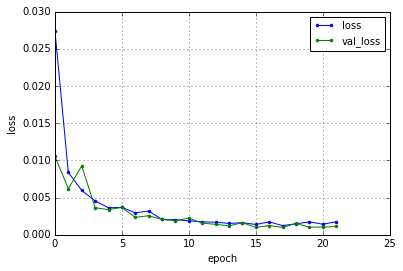

hiden node = 32
-edim=32-Window=512-Overlap=16-Adagrad
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
1s - loss: 0.0268 - val_loss: 0.0135
Epoch 2/50
1s - loss: 0.0129 - val_loss: 0.0103
Epoch 3/50
1s - loss: 0.0102 - val_loss: 0.0084
Epoch 4/50
1s - loss: 0.0086 - val_loss: 0.0072
Epoch 5/50
1s - loss: 0.0077 - val_loss: 0.0064
Epoch 6/50
1s - loss: 0.0068 - val_loss: 0.0059
Epoch 7/50
1s - loss: 0.0064 - val_loss: 0.0059
Epoch 8/50
1s - loss: 0.0059 - val_loss: 0.0051
Epoch 9/50
1s - loss: 0.0054 - val_loss: 0.0048
Epoch 10/50
1s - loss: 0.0053 - val_loss: 0.0046
Epoch 11/50
1s - loss: 0.0048 - val_loss: 0.0061
Epoch 12/50
1s - loss: 0.0046 - val_loss: 0.0041
Epoch 13/50
1s - loss: 0.0043 - val_loss: 0.0048
Epoch 14/50
1s - loss: 0.0044 - val_loss: 0.0038
Epoch 15/50
1s - loss: 0.0040 - val_loss: 0.0036
Epoch 16/50
1s - loss: 0.0039 - val_loss: 0.0037
Epoch 17/50
1s - loss: 0.0037 - val_loss: 0.0051
Epoch 18/50
1s - loss: 0.0038 - val_loss: 0.0033
Epoch 19/50
1s - loss:

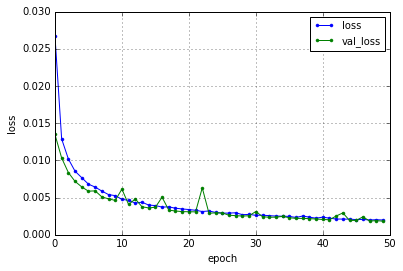

hiden node = 32
-edim=32-Window=512-Overlap=16-RMSprop
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
1s - loss: 0.0290 - val_loss: 0.0616
Epoch 2/50
1s - loss: 0.0161 - val_loss: 0.0114
Epoch 3/50
1s - loss: 0.0138 - val_loss: 0.0144
Epoch 4/50
1s - loss: 0.0125 - val_loss: 0.0133
Epoch 5/50
1s - loss: 0.0117 - val_loss: 0.0104
Epoch 6/50
1s - loss: 0.0109 - val_loss: 0.0255
Epoch 7/50
1s - loss: 0.0104 - val_loss: 0.0081
Epoch 8/50
1s - loss: 0.0100 - val_loss: 0.0203
Epoch 9/50
1s - loss: 0.0094 - val_loss: 0.0296
Epoch 10/50
1s - loss: 0.0093 - val_loss: 0.0090
Epoch 11/50
1s - loss: 0.0090 - val_loss: 0.0117
Epoch 12/50
1s - loss: 0.0088 - val_loss: 0.0072
Epoch 13/50
1s - loss: 0.0087 - val_loss: 0.0055
Epoch 14/50
1s - loss: 0.0084 - val_loss: 0.0145
Epoch 15/50
1s - loss: 0.0083 - val_loss: 0.0045
Epoch 16/50
1s - loss: 0.0082 - val_loss: 0.0149
Epoch 17/50
1s - loss: 0.0081 - val_loss: 0.0049
Epoch 18/50
1s - loss: 0.0081 - val_loss: 0.0159
Epoch 19/50
1s - loss:

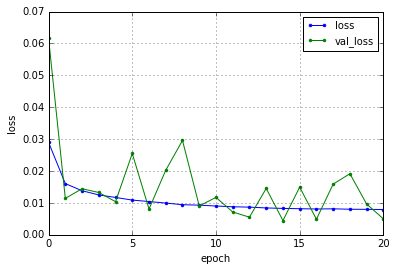

hiden node = 32
-edim=32-Window=512-Overlap=16-Nadam
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
1s - loss: 0.0300 - val_loss: 0.0151
Epoch 2/50
1s - loss: 0.0151 - val_loss: 0.0088
Epoch 3/50
1s - loss: 0.0125 - val_loss: 0.0099
Epoch 4/50
1s - loss: 0.0106 - val_loss: 0.0174
Epoch 5/50
1s - loss: 0.0088 - val_loss: 0.0055
Epoch 6/50
1s - loss: 0.0083 - val_loss: 0.0048
Epoch 7/50
1s - loss: 0.0075 - val_loss: 0.0063
Epoch 8/50
1s - loss: 0.0072 - val_loss: 0.0072
Epoch 9/50
1s - loss: 0.0066 - val_loss: 0.0066
Epoch 10/50
1s - loss: 0.0062 - val_loss: 0.0066
Epoch 11/50
1s - loss: 0.0059 - val_loss: 0.0051
Epoch 12/50
1s - loss: 0.0057 - val_loss: 0.0040
Epoch 13/50
1s - loss: 0.0059 - val_loss: 0.0057
Epoch 14/50
1s - loss: 0.0052 - val_loss: 0.0033
Epoch 15/50
1s - loss: 0.0052 - val_loss: 0.0066
Epoch 16/50
1s - loss: 0.0049 - val_loss: 0.0032
Epoch 17/50
1s - loss: 0.0050 - val_loss: 0.0034
Epoch 18/50
1s - loss: 0.0046 - val_loss: 0.0035
Epoch 19/50
1s - loss: 0

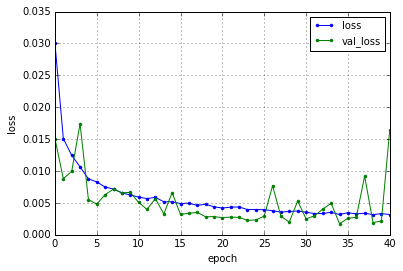

AccY is registed now
Build Complete
(254742,)
windowData's num =15858
SourceData's aborting data = 6
window shape is (15858, 1024, 1)
hiden node = 32
-edim=32-Window=1024-Overlap=16-SGD
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.2984 - val_loss: 0.2808
Epoch 2/50
1s - loss: 0.2620 - val_loss: 0.2419
Epoch 3/50
1s - loss: 0.2214 - val_loss: 0.2012
Epoch 4/50
1s - loss: 0.1832 - val_loss: 0.1664
Epoch 5/50
1s - loss: 0.1523 - val_loss: 0.1396
Epoch 6/50
1s - loss: 0.1291 - val_loss: 0.1197
Epoch 7/50
1s - loss: 0.1119 - val_loss: 0.1049
Epoch 8/50
1s - loss: 0.0990 - val_loss: 0.0936
Epoch 9/50
1s - loss: 0.0891 - val_loss: 0.0848
Epoch 10/50
1s - loss: 0.0812 - val_loss: 0.0778
Epoch 11/50
1s - loss: 0.0749 - val_loss: 0.0722
Epoch 12/50
1s - loss: 0.0698 - val_loss: 0.0676
Epoch 13/50
1s - loss: 0.0656 - val_loss: 0.0638
Epoch 14/50
1s - loss: 0.0621 - val_loss: 0.0606
Epoch 15/50
1s - loss: 0.0592 - val_loss: 0.0579
Epoch 16/50
1s - loss: 0.0568 - val_lo

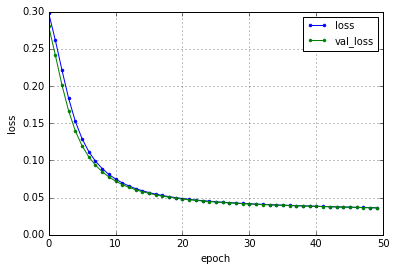

hiden node = 32
-edim=32-Window=1024-Overlap=16-Adadelta
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0579 - val_loss: 0.0338
Epoch 2/50
1s - loss: 0.0294 - val_loss: 0.0256
Epoch 3/50
1s - loss: 0.0248 - val_loss: 0.0271
Epoch 4/50
1s - loss: 0.0223 - val_loss: 0.0216
Epoch 5/50
2s - loss: 0.0204 - val_loss: 0.0190
Epoch 6/50
1s - loss: 0.0194 - val_loss: 0.0181
Epoch 7/50
2s - loss: 0.0182 - val_loss: 0.0166
Epoch 8/50
1s - loss: 0.0173 - val_loss: 0.0144
Epoch 9/50
1s - loss: 0.0170 - val_loss: 0.0143
Epoch 10/50
1s - loss: 0.0162 - val_loss: 0.0167
Epoch 11/50
1s - loss: 0.0154 - val_loss: 0.0170
Epoch 12/50
1s - loss: 0.0156 - val_loss: 0.0129
Epoch 13/50
1s - loss: 0.0145 - val_loss: 0.0144
Epoch 14/50
1s - loss: 0.0143 - val_loss: 0.0115
Epoch 15/50
1s - loss: 0.0140 - val_loss: 0.0123
Epoch 16/50
1s - loss: 0.0134 - val_loss: 0.0146
Epoch 17/50
1s - loss: 0.0138 - val_loss: 0.0138
Epoch 18/50
1s - loss: 0.0132 - val_loss: 0.0125
Epoch 19/50
2s - los

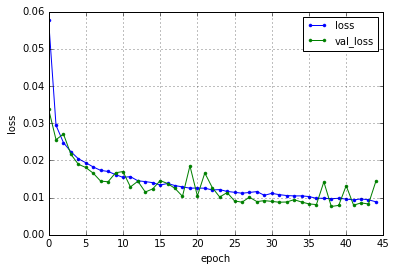

hiden node = 32
-edim=32-Window=1024-Overlap=16-Adamax
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0323 - val_loss: 0.0176
Epoch 2/50
1s - loss: 0.0146 - val_loss: 0.0122
Epoch 3/50
1s - loss: 0.0103 - val_loss: 0.0084
Epoch 4/50
1s - loss: 0.0081 - val_loss: 0.0068
Epoch 5/50
1s - loss: 0.0065 - val_loss: 0.0056
Epoch 6/50
2s - loss: 0.0057 - val_loss: 0.0057
Epoch 7/50
2s - loss: 0.0052 - val_loss: 0.0045
Epoch 8/50
1s - loss: 0.0048 - val_loss: 0.0043
Epoch 9/50
1s - loss: 0.0046 - val_loss: 0.0039
Epoch 10/50
1s - loss: 0.0044 - val_loss: 0.0045
Epoch 11/50
1s - loss: 0.0043 - val_loss: 0.0039
Epoch 12/50
1s - loss: 0.0041 - val_loss: 0.0035
Epoch 13/50
1s - loss: 0.0041 - val_loss: 0.0037
Epoch 14/50
1s - loss: 0.0039 - val_loss: 0.0035
Epoch 15/50
1s - loss: 0.0036 - val_loss: 0.0072
Epoch 16/50
1s - loss: 0.0038 - val_loss: 0.0033
Epoch 17/50
1s - loss: 0.0038 - val_loss: 0.0045
Epoch 18/50
2s - loss: 0.0037 - val_loss: 0.0039
Epoch 19/50
1s - loss:

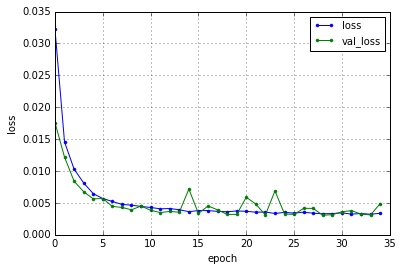

hiden node = 32
-edim=32-Window=1024-Overlap=16-Adam
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0325 - val_loss: 0.0174
Epoch 2/50
1s - loss: 0.0129 - val_loss: 0.0120
Epoch 3/50
1s - loss: 0.0097 - val_loss: 0.0072
Epoch 4/50
1s - loss: 0.0075 - val_loss: 0.0059
Epoch 5/50
1s - loss: 0.0071 - val_loss: 0.0056
Epoch 6/50
1s - loss: 0.0059 - val_loss: 0.0128
Epoch 7/50
1s - loss: 0.0060 - val_loss: 0.0047
Epoch 8/50
3s - loss: 0.0055 - val_loss: 0.0063
Epoch 9/50
3s - loss: 0.0049 - val_loss: 0.0041
Epoch 10/50
3s - loss: 0.0048 - val_loss: 0.0040
Epoch 11/50
3s - loss: 0.0049 - val_loss: 0.0074
Epoch 12/50
1s - loss: 0.0047 - val_loss: 0.0043
Epoch 13/50
1s - loss: 0.0049 - val_loss: 0.0043
Epoch 14/50
1s - loss: 0.0043 - val_loss: 0.0068
Epoch 15/50
1s - loss: 0.0042 - val_loss: 0.0037
Epoch 16/50
1s - loss: 0.0046 - val_loss: 0.0037
Epoch 17/50
1s - loss: 0.0041 - val_loss: 0.0036
Epoch 18/50
1s - loss: 0.0041 - val_loss: 0.0036
Epoch 19/50
1s - loss: 0

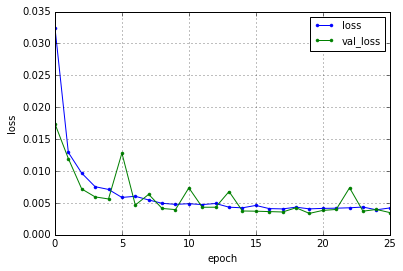

hiden node = 32
-edim=32-Window=1024-Overlap=16-Adagrad
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0362 - val_loss: 0.0221
Epoch 2/50
1s - loss: 0.0192 - val_loss: 0.0146
Epoch 3/50
1s - loss: 0.0153 - val_loss: 0.0130
Epoch 4/50
1s - loss: 0.0129 - val_loss: 0.0154
Epoch 5/50
1s - loss: 0.0115 - val_loss: 0.0097
Epoch 6/50
1s - loss: 0.0105 - val_loss: 0.0088
Epoch 7/50
1s - loss: 0.0097 - val_loss: 0.0097
Epoch 8/50
1s - loss: 0.0090 - val_loss: 0.0153
Epoch 9/50
1s - loss: 0.0086 - val_loss: 0.0083
Epoch 10/50
2s - loss: 0.0081 - val_loss: 0.0071
Epoch 11/50
1s - loss: 0.0078 - val_loss: 0.0075
Epoch 12/50
1s - loss: 0.0074 - val_loss: 0.0067
Epoch 13/50
3s - loss: 0.0072 - val_loss: 0.0088
Epoch 14/50
3s - loss: 0.0072 - val_loss: 0.0074
Epoch 15/50
2s - loss: 0.0069 - val_loss: 0.0073
Epoch 16/50
1s - loss: 0.0065 - val_loss: 0.0062
Epoch 17/50
1s - loss: 0.0065 - val_loss: 0.0060
Epoch 18/50
1s - loss: 0.0062 - val_loss: 0.0064
Epoch 19/50
1s - loss

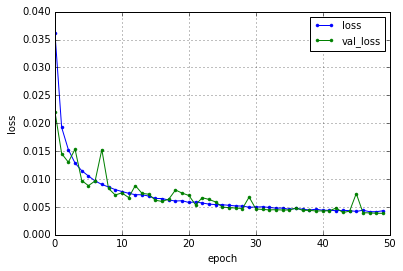

hiden node = 32
-edim=32-Window=1024-Overlap=16-RMSprop
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0407 - val_loss: 0.0412
Epoch 2/50
1s - loss: 0.0259 - val_loss: 0.0185
Epoch 3/50
1s - loss: 0.0225 - val_loss: 0.0157
Epoch 4/50
1s - loss: 0.0206 - val_loss: 0.0166
Epoch 5/50
1s - loss: 0.0191 - val_loss: 0.0175
Epoch 6/50
1s - loss: 0.0184 - val_loss: 0.0112
Epoch 7/50
1s - loss: 0.0174 - val_loss: 0.0233
Epoch 8/50
1s - loss: 0.0169 - val_loss: 0.0255
Epoch 9/50
1s - loss: 0.0165 - val_loss: 0.0173
Epoch 10/50
1s - loss: 0.0159 - val_loss: 0.0133
Epoch 11/50
1s - loss: 0.0154 - val_loss: 0.0157
Epoch 12/50
1s - loss: 0.0154 - val_loss: 0.0091
Epoch 13/50
1s - loss: 0.0152 - val_loss: 0.0206
Epoch 14/50
1s - loss: 0.0148 - val_loss: 0.0144
Epoch 15/50
1s - loss: 0.0147 - val_loss: 0.0122
Epoch 16/50
1s - loss: 0.0146 - val_loss: 0.0149
Epoch 17/50
1s - loss: 0.0145 - val_loss: 0.0117
Epoch 18/50
1s - loss: 0.0142 - val_loss: 0.0130


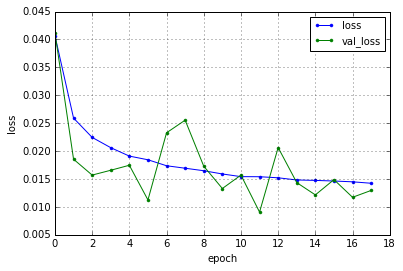

hiden node = 32
-edim=32-Window=1024-Overlap=16-Nadam
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0490 - val_loss: 0.0433
Epoch 2/50
1s - loss: 0.0358 - val_loss: 0.0276
Epoch 3/50
1s - loss: 0.0336 - val_loss: 0.0300
Epoch 4/50
1s - loss: 0.0296 - val_loss: 0.0480
Epoch 5/50
1s - loss: 0.0218 - val_loss: 0.0139
Epoch 6/50
1s - loss: 0.0212 - val_loss: 0.0165
Epoch 7/50
1s - loss: 0.0172 - val_loss: 0.0139
Epoch 8/50
1s - loss: 0.0170 - val_loss: 0.0229
Epoch 9/50
1s - loss: 0.0169 - val_loss: 0.0101
Epoch 10/50
1s - loss: 0.0131 - val_loss: 0.0157
Epoch 11/50
1s - loss: 0.0122 - val_loss: 0.0105
Epoch 12/50
1s - loss: 0.0111 - val_loss: 0.0136
Epoch 13/50
1s - loss: 0.0111 - val_loss: 0.0104
Epoch 14/50
1s - loss: 0.0098 - val_loss: 0.0154
Epoch 15/50
1s - loss: 0.0093 - val_loss: 0.0072
Epoch 16/50
1s - loss: 0.0096 - val_loss: 0.0139
Epoch 17/50
1s - loss: 0.0084 - val_loss: 0.0136
Epoch 18/50
1s - loss: 0.0082 - val_loss: 0.0074
Epoch 19/50
1s - loss: 

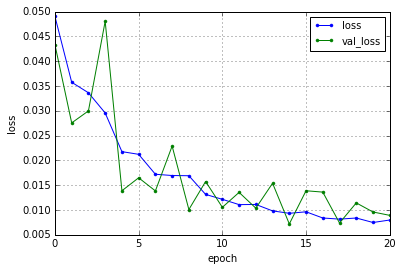

AccY is registed now
Build Complete
(254742,)
windowData's num =15794
SourceData's aborting data = 6
window shape is (15794, 2048, 1)
hiden node = 32
-edim=32-Window=2048-Overlap=16-SGD
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
3s - loss: 0.2982 - val_loss: 0.2880
Epoch 2/50
4s - loss: 0.2761 - val_loss: 0.2636
Epoch 3/50
4s - loss: 0.2507 - val_loss: 0.2380
Epoch 4/50
3s - loss: 0.2261 - val_loss: 0.2147
Epoch 5/50
3s - loss: 0.2044 - val_loss: 0.1945
Epoch 6/50
4s - loss: 0.1858 - val_loss: 0.1774
Epoch 7/50
3s - loss: 0.1700 - val_loss: 0.1630
Epoch 8/50
3s - loss: 0.1567 - val_loss: 0.1508
Epoch 9/50
3s - loss: 0.1455 - val_loss: 0.1405
Epoch 10/50
3s - loss: 0.1359 - val_loss: 0.1316
Epoch 11/50
3s - loss: 0.1277 - val_loss: 0.1239
Epoch 12/50
3s - loss: 0.1204 - val_loss: 0.1171
Epoch 13/50
3s - loss: 0.1141 - val_loss: 0.1111
Epoch 14/50
3s - loss: 0.1084 - val_loss: 0.1058
Epoch 15/50
3s - loss: 0.1034 - val_loss: 0.1011
Epoch 16/50
3s - loss: 0.0989 - val_lo

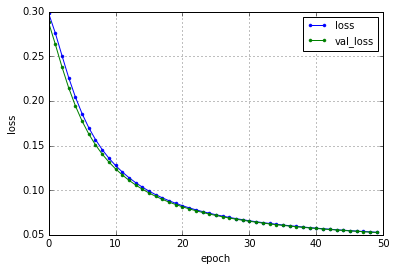

hiden node = 32
-edim=32-Window=2048-Overlap=16-Adadelta
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
3s - loss: 0.0781 - val_loss: 0.0428
Epoch 2/50
3s - loss: 0.0397 - val_loss: 0.0448
Epoch 3/50
3s - loss: 0.0355 - val_loss: 0.0323
Epoch 4/50
4s - loss: 0.0328 - val_loss: 0.0289
Epoch 5/50
3s - loss: 0.0305 - val_loss: 0.0280
Epoch 6/50
3s - loss: 0.0293 - val_loss: 0.0323
Epoch 7/50
3s - loss: 0.0283 - val_loss: 0.0321
Epoch 8/50
4s - loss: 0.0272 - val_loss: 0.0264
Epoch 9/50
4s - loss: 0.0268 - val_loss: 0.0291
Epoch 10/50
4s - loss: 0.0260 - val_loss: 0.0224
Epoch 11/50
3s - loss: 0.0252 - val_loss: 0.0268
Epoch 12/50
3s - loss: 0.0248 - val_loss: 0.0211
Epoch 13/50
3s - loss: 0.0242 - val_loss: 0.0233
Epoch 14/50
4s - loss: 0.0238 - val_loss: 0.0231
Epoch 15/50
3s - loss: 0.0235 - val_loss: 0.0308
Epoch 16/50
3s - loss: 0.0228 - val_loss: 0.0227
Epoch 17/50
4s - loss: 0.0224 - val_loss: 0.0188
Epoch 18/50
3s - loss: 0.0219 - val_loss: 0.0276
Epoch 19/50
3s - los

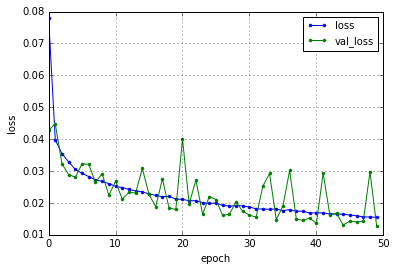

hiden node = 32
-edim=32-Window=2048-Overlap=16-Adamax
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
3s - loss: 0.0429 - val_loss: 0.0250
Epoch 2/50
3s - loss: 0.0221 - val_loss: 0.0187
Epoch 3/50
3s - loss: 0.0167 - val_loss: 0.0136
Epoch 4/50
3s - loss: 0.0139 - val_loss: 0.0111
Epoch 5/50
3s - loss: 0.0116 - val_loss: 0.0105
Epoch 6/50
5s - loss: 0.0100 - val_loss: 0.0085
Epoch 7/50
4s - loss: 0.0090 - val_loss: 0.0080
Epoch 8/50
4s - loss: 0.0086 - val_loss: 0.0083
Epoch 9/50
4s - loss: 0.0084 - val_loss: 0.0072
Epoch 10/50
4s - loss: 0.0083 - val_loss: 0.0088
Epoch 11/50
4s - loss: 0.0078 - val_loss: 0.0069
Epoch 12/50
4s - loss: 0.0076 - val_loss: 0.0067
Epoch 13/50
4s - loss: 0.0077 - val_loss: 0.0081
Epoch 14/50
5s - loss: 0.0075 - val_loss: 0.0064
Epoch 15/50
4s - loss: 0.0071 - val_loss: 0.0064
Epoch 16/50
4s - loss: 0.0075 - val_loss: 0.0070
Epoch 17/50
3s - loss: 0.0073 - val_loss: 0.0079
Epoch 18/50
4s - loss: 0.0072 - val_loss: 0.0101
Epoch 19/50
4s - loss:

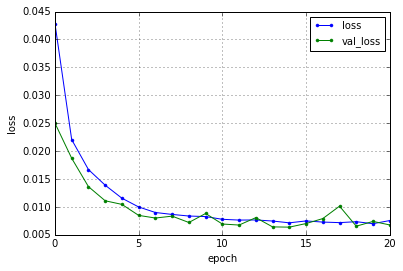

hiden node = 32
-edim=32-Window=2048-Overlap=16-Adam
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
4s - loss: 0.0410 - val_loss: 0.0225
Epoch 2/50
4s - loss: 0.0203 - val_loss: 0.0159
Epoch 3/50
3s - loss: 0.0157 - val_loss: 0.0129
Epoch 4/50
4s - loss: 0.0140 - val_loss: 0.0119
Epoch 5/50
4s - loss: 0.0122 - val_loss: 0.0109
Epoch 6/50
3s - loss: 0.0115 - val_loss: 0.0094
Epoch 7/50
3s - loss: 0.0107 - val_loss: 0.0098
Epoch 8/50
4s - loss: 0.0113 - val_loss: 0.0101
Epoch 9/50
4s - loss: 0.0104 - val_loss: 0.0087
Epoch 10/50
4s - loss: 0.0112 - val_loss: 0.0095
Epoch 11/50
3s - loss: 0.0095 - val_loss: 0.0102
Epoch 12/50
4s - loss: 0.0093 - val_loss: 0.0088
Epoch 13/50
4s - loss: 0.0096 - val_loss: 0.0085
Epoch 14/50
4s - loss: 0.0090 - val_loss: 0.0077
Epoch 15/50
4s - loss: 0.0092 - val_loss: 0.0082
Epoch 16/50
4s - loss: 0.0095 - val_loss: 0.0082
Epoch 17/50
4s - loss: 0.0090 - val_loss: 0.0077
Epoch 18/50
4s - loss: 0.0090 - val_loss: 0.0078
Epoch 19/50
4s - loss: 0

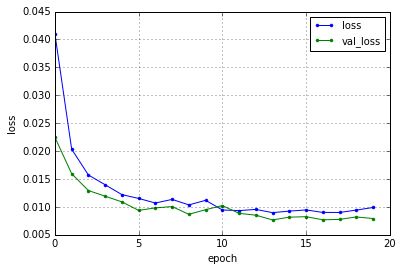

hiden node = 32
-edim=32-Window=2048-Overlap=16-Adagrad
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
4s - loss: 0.0532 - val_loss: 0.0319
Epoch 2/50
3s - loss: 0.0300 - val_loss: 0.0275
Epoch 3/50
3s - loss: 0.0245 - val_loss: 0.0230
Epoch 4/50
3s - loss: 0.0211 - val_loss: 0.0175
Epoch 5/50
3s - loss: 0.0188 - val_loss: 0.0179
Epoch 6/50
4s - loss: 0.0171 - val_loss: 0.0156
Epoch 7/50
4s - loss: 0.0162 - val_loss: 0.0157
Epoch 8/50
3s - loss: 0.0151 - val_loss: 0.0138
Epoch 9/50
3s - loss: 0.0142 - val_loss: 0.0129
Epoch 10/50
3s - loss: 0.0135 - val_loss: 0.0131
Epoch 11/50
3s - loss: 0.0133 - val_loss: 0.0150
Epoch 12/50
3s - loss: 0.0127 - val_loss: 0.0114
Epoch 13/50
3s - loss: 0.0124 - val_loss: 0.0119
Epoch 14/50
4s - loss: 0.0121 - val_loss: 0.0114
Epoch 15/50
3s - loss: 0.0115 - val_loss: 0.0319
Epoch 16/50
3s - loss: 0.0115 - val_loss: 0.0112
Epoch 17/50
3s - loss: 0.0110 - val_loss: 0.0118
Epoch 18/50
4s - loss: 0.0110 - val_loss: 0.0097
Epoch 19/50
3s - loss

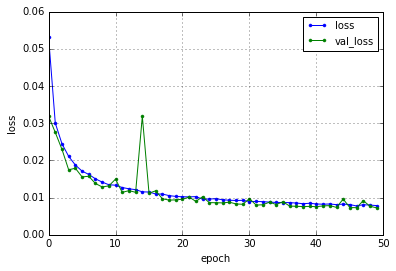

hiden node = 32
-edim=32-Window=2048-Overlap=16-RMSprop
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
3s - loss: 0.0545 - val_loss: 0.0403
Epoch 2/50
4s - loss: 0.0391 - val_loss: 0.0274
Epoch 3/50
3s - loss: 0.0347 - val_loss: 0.0236
Epoch 4/50
4s - loss: 0.0320 - val_loss: 0.0241
Epoch 5/50
3s - loss: 0.0308 - val_loss: 0.0322
Epoch 6/50
6s - loss: 0.0295 - val_loss: 0.0221
Epoch 7/50
3s - loss: 0.0283 - val_loss: 0.0202
Epoch 8/50
3s - loss: 0.0271 - val_loss: 0.0712
Epoch 9/50
3s - loss: 0.0274 - val_loss: 0.0202
Epoch 10/50
3s - loss: 0.0262 - val_loss: 0.0302
Epoch 11/50
3s - loss: 0.0257 - val_loss: 0.0261
Epoch 12/50
3s - loss: 0.0255 - val_loss: 0.0205
Epoch 13/50
3s - loss: 0.0252 - val_loss: 0.0181
Epoch 14/50
4s - loss: 0.0249 - val_loss: 0.0189
Epoch 15/50
4s - loss: 0.0246 - val_loss: 0.0711
Epoch 16/50
4s - loss: 0.0243 - val_loss: 0.0353
Epoch 17/50
3s - loss: 0.0236 - val_loss: 0.0264
Epoch 18/50
3s - loss: 0.0231 - val_loss: 0.0238
Epoch 19/50
3s - loss

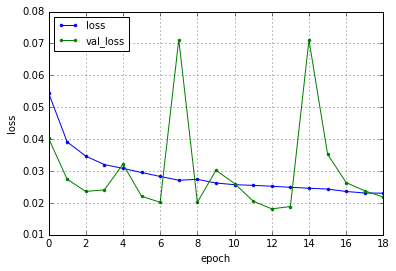

hiden node = 32
-edim=32-Window=2048-Overlap=16-Nadam
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
3s - loss: 0.0695 - val_loss: 0.0535
Epoch 2/50
3s - loss: 0.0499 - val_loss: 0.0417
Epoch 3/50
3s - loss: 0.0474 - val_loss: 0.0401
Epoch 4/50
3s - loss: 0.0443 - val_loss: 0.0354
Epoch 5/50
3s - loss: 0.0413 - val_loss: 0.0635
Epoch 6/50
3s - loss: 0.0429 - val_loss: 0.0377
Epoch 7/50
4s - loss: 0.0426 - val_loss: 0.0559
Epoch 8/50
4s - loss: 0.0367 - val_loss: 0.0319
Epoch 9/50
3s - loss: 0.0438 - val_loss: 0.0473
Epoch 10/50
3s - loss: 0.0417 - val_loss: 0.0693
Epoch 11/50
3s - loss: 0.0428 - val_loss: 0.0336
Epoch 12/50
4s - loss: 0.0395 - val_loss: 0.0320
Epoch 13/50
3s - loss: 0.0311 - val_loss: 0.0342
Epoch 14/50
3s - loss: 0.0284 - val_loss: 0.0246
Epoch 15/50
3s - loss: 0.0248 - val_loss: 0.0285
Epoch 16/50
3s - loss: 0.0313 - val_loss: 0.0566
Epoch 17/50
4s - loss: 0.0296 - val_loss: 0.0232
Epoch 18/50
4s - loss: 0.0228 - val_loss: 0.0205
Epoch 19/50
4s - loss: 

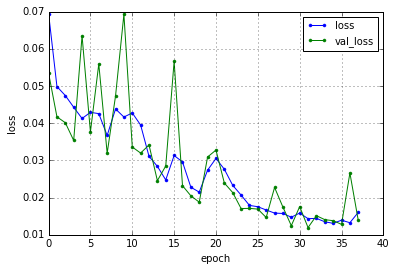

AccY is registed now
Build Complete
(254742,)
windowData's num =15666
SourceData's aborting data = 6
window shape is (15666, 4096, 1)
hiden node = 32
-edim=32-Window=4096-Overlap=16-SGD
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
6s - loss: 0.3041 - val_loss: 0.2996
Epoch 2/50
6s - loss: 0.2945 - val_loss: 0.2888
Epoch 3/50
6s - loss: 0.2824 - val_loss: 0.2757
Epoch 4/50
6s - loss: 0.2689 - val_loss: 0.2621
Epoch 5/50
6s - loss: 0.2554 - val_loss: 0.2489
Epoch 6/50
7s - loss: 0.2426 - val_loss: 0.2365
Epoch 7/50
6s - loss: 0.2308 - val_loss: 0.2251
Epoch 8/50
6s - loss: 0.2198 - val_loss: 0.2147
Epoch 9/50
6s - loss: 0.2099 - val_loss: 0.2052
Epoch 10/50
6s - loss: 0.2008 - val_loss: 0.1966
Epoch 11/50
6s - loss: 0.1926 - val_loss: 0.1888
Epoch 12/50
6s - loss: 0.1852 - val_loss: 0.1816
Epoch 13/50
6s - loss: 0.1783 - val_loss: 0.1751
Epoch 14/50
6s - loss: 0.1721 - val_loss: 0.1692
Epoch 15/50
6s - loss: 0.1665 - val_loss: 0.1638
Epoch 16/50
6s - loss: 0.1612 - val_lo

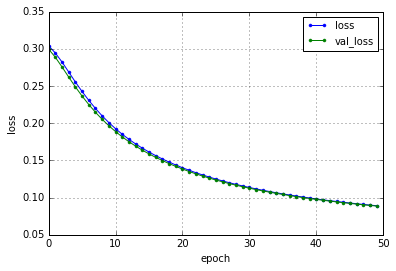

hiden node = 32
-edim=32-Window=4096-Overlap=16-Adadelta
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
7s - loss: 0.1134 - val_loss: 0.0699
Epoch 2/50
7s - loss: 0.0580 - val_loss: 0.0504
Epoch 3/50
6s - loss: 0.0489 - val_loss: 0.0437
Epoch 4/50
7s - loss: 0.0447 - val_loss: 0.0408
Epoch 5/50
8s - loss: 0.0416 - val_loss: 0.0452
Epoch 6/50
7s - loss: 0.0402 - val_loss: 0.0377
Epoch 7/50
6s - loss: 0.0387 - val_loss: 0.0389
Epoch 8/50
6s - loss: 0.0376 - val_loss: 0.0342
Epoch 9/50
6s - loss: 0.0363 - val_loss: 0.0331
Epoch 10/50
6s - loss: 0.0356 - val_loss: 0.0322
Epoch 11/50
6s - loss: 0.0348 - val_loss: 0.0317
Epoch 12/50
6s - loss: 0.0341 - val_loss: 0.0385
Epoch 13/50
6s - loss: 0.0338 - val_loss: 0.0301
Epoch 14/50
6s - loss: 0.0334 - val_loss: 0.0299
Epoch 15/50
7s - loss: 0.0330 - val_loss: 0.0319
Epoch 16/50
7s - loss: 0.0320 - val_loss: 0.0288
Epoch 17/50
7s - loss: 0.0322 - val_loss: 0.0360
Epoch 18/50
6s - loss: 0.0318 - val_loss: 0.0298
Epoch 19/50
7s - los

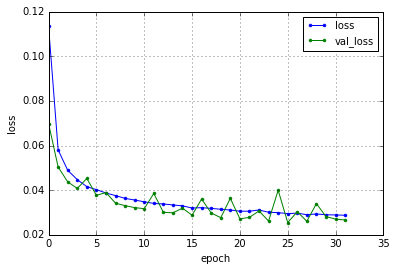

hiden node = 32
-edim=32-Window=4096-Overlap=16-Adamax
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
6s - loss: 0.0479 - val_loss: 0.0328
Epoch 2/50
6s - loss: 0.0269 - val_loss: 0.0300
Epoch 3/50
6s - loss: 0.0229 - val_loss: 0.0198
Epoch 4/50
6s - loss: 0.0198 - val_loss: 0.0236
Epoch 5/50
6s - loss: 0.0180 - val_loss: 0.0171
Epoch 6/50
7s - loss: 0.0165 - val_loss: 0.0159
Epoch 7/50
6s - loss: 0.0159 - val_loss: 0.0145
Epoch 8/50
6s - loss: 0.0155 - val_loss: 0.0315
Epoch 9/50
6s - loss: 0.0151 - val_loss: 0.0154
Epoch 10/50
6s - loss: 0.0146 - val_loss: 0.0132
Epoch 11/50
6s - loss: 0.0140 - val_loss: 0.0163
Epoch 12/50
7s - loss: 0.0152 - val_loss: 0.0128
Epoch 13/50
7s - loss: 0.0140 - val_loss: 0.0125
Epoch 14/50
7s - loss: 0.0139 - val_loss: 0.0135
Epoch 15/50
6s - loss: 0.0137 - val_loss: 0.0138
Epoch 16/50
6s - loss: 0.0134 - val_loss: 0.0129
Epoch 17/50
7s - loss: 0.0136 - val_loss: 0.0130
Epoch 18/50
6s - loss: 0.0138 - val_loss: 0.0204
Epoch 19/50
8s - loss:

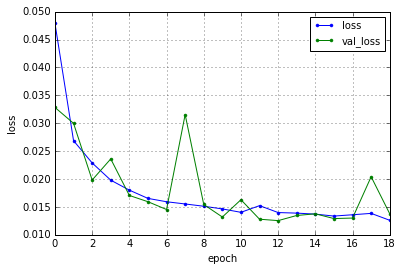

hiden node = 32
-edim=32-Window=4096-Overlap=16-Adam
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
6s - loss: 0.0579 - val_loss: 0.0462
Epoch 2/50
6s - loss: 0.0386 - val_loss: 0.0330
Epoch 3/50
7s - loss: 0.0340 - val_loss: 0.0300
Epoch 4/50
7s - loss: 0.0304 - val_loss: 0.0274
Epoch 5/50
6s - loss: 0.0267 - val_loss: 0.0223
Epoch 6/50
6s - loss: 0.0275 - val_loss: 0.0301
Epoch 7/50
6s - loss: 0.0237 - val_loss: 0.0324
Epoch 8/50
7s - loss: 0.0232 - val_loss: 0.0208
Epoch 9/50
7s - loss: 0.0231 - val_loss: 0.0226
Epoch 10/50
6s - loss: 0.0210 - val_loss: 0.0212
Epoch 11/50
6s - loss: 0.0224 - val_loss: 0.0207
Epoch 12/50
6s - loss: 0.0213 - val_loss: 0.0221
Epoch 13/50
6s - loss: 0.0205 - val_loss: 0.0389
Epoch 14/50
6s - loss: 0.0200 - val_loss: 0.0192
Epoch 15/50
6s - loss: 0.0198 - val_loss: 0.0329
Epoch 16/50
6s - loss: 0.0217 - val_loss: 0.0191
Epoch 17/50
6s - loss: 0.0233 - val_loss: 0.0205
Epoch 18/50
6s - loss: 0.0208 - val_loss: 0.0221
Epoch 19/50
6s - loss: 0

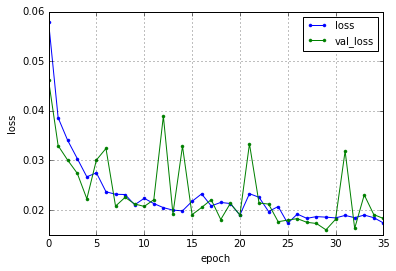

hiden node = 32
-edim=32-Window=4096-Overlap=16-Adagrad
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
6s - loss: 0.0683 - val_loss: 0.0517
Epoch 2/50
8s - loss: 0.0451 - val_loss: 0.0414
Epoch 3/50
6s - loss: 0.0386 - val_loss: 0.0369
Epoch 4/50
6s - loss: 0.0344 - val_loss: 0.0328
Epoch 5/50
6s - loss: 0.0319 - val_loss: 0.0348
Epoch 6/50
6s - loss: 0.0298 - val_loss: 0.0272
Epoch 7/50
6s - loss: 0.0286 - val_loss: 0.0291
Epoch 8/50
6s - loss: 0.0269 - val_loss: 0.0245
Epoch 9/50
6s - loss: 0.0256 - val_loss: 0.0237
Epoch 10/50
6s - loss: 0.0250 - val_loss: 0.0237
Epoch 11/50
8s - loss: 0.0239 - val_loss: 0.0222
Epoch 12/50
6s - loss: 0.0236 - val_loss: 0.0235
Epoch 13/50
9s - loss: 0.0226 - val_loss: 0.0202
Epoch 14/50
6s - loss: 0.0221 - val_loss: 0.0219
Epoch 15/50
6s - loss: 0.0213 - val_loss: 0.0217
Epoch 16/50
7s - loss: 0.0212 - val_loss: 0.0191
Epoch 17/50
8s - loss: 0.0206 - val_loss: 0.0209
Epoch 18/50
7s - loss: 0.0204 - val_loss: 0.0193
Epoch 19/50
6s - loss

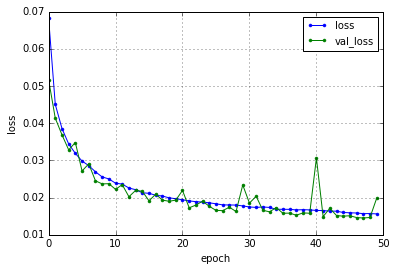

hiden node = 32
-edim=32-Window=4096-Overlap=16-RMSprop
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
6s - loss: 0.0705 - val_loss: 0.0509
Epoch 2/50
7s - loss: 0.0535 - val_loss: 0.0493
Epoch 3/50
6s - loss: 0.0492 - val_loss: 0.0573
Epoch 4/50
6s - loss: 0.0482 - val_loss: 0.0427
Epoch 5/50
6s - loss: 0.0449 - val_loss: 0.0498
Epoch 6/50
6s - loss: 0.0423 - val_loss: 0.0462
Epoch 7/50
6s - loss: 0.0430 - val_loss: 0.0423
Epoch 8/50
6s - loss: 0.0412 - val_loss: 0.0563
Epoch 9/50
6s - loss: 0.0398 - val_loss: 0.0354
Epoch 10/50
6s - loss: 0.0385 - val_loss: 0.0389
Epoch 11/50
6s - loss: 0.0371 - val_loss: 0.0358
Epoch 12/50
6s - loss: 0.0366 - val_loss: 0.0327
Epoch 13/50
6s - loss: 0.0359 - val_loss: 0.0599
Epoch 14/50
6s - loss: 0.0354 - val_loss: 0.0407
Epoch 15/50
6s - loss: 0.0348 - val_loss: 0.0385
Epoch 16/50
6s - loss: 0.0342 - val_loss: 0.0474
Epoch 17/50
6s - loss: 0.0337 - val_loss: 0.0295
Epoch 18/50
6s - loss: 0.0332 - val_loss: 0.0299
Epoch 19/50
6s - loss

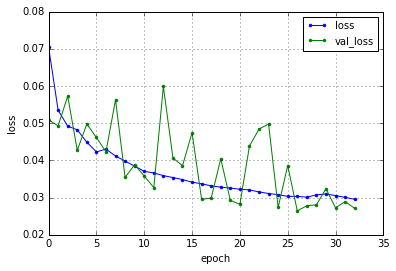

hiden node = 32
-edim=32-Window=4096-Overlap=16-Nadam
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
6s - loss: 0.0816 - val_loss: 0.0687
Epoch 2/50
6s - loss: 0.0618 - val_loss: 0.0633
Epoch 3/50
6s - loss: 0.0574 - val_loss: 0.0521
Epoch 4/50
6s - loss: 0.0528 - val_loss: 0.0586
Epoch 5/50
7s - loss: 0.0503 - val_loss: 0.0463
Epoch 6/50
6s - loss: 0.0471 - val_loss: 0.0439
Epoch 7/50
6s - loss: 0.0440 - val_loss: 0.0511
Epoch 8/50
6s - loss: 0.0430 - val_loss: 0.0449
Epoch 9/50
6s - loss: 0.0442 - val_loss: 0.0392
Epoch 10/50
6s - loss: 0.0494 - val_loss: 0.0581
Epoch 11/50
6s - loss: 0.0519 - val_loss: 0.0435
Epoch 12/50
6s - loss: 0.0438 - val_loss: 0.0444
Epoch 13/50
6s - loss: 0.0434 - val_loss: 0.0406
Epoch 14/50
6s - loss: 0.0387 - val_loss: 0.0373
Epoch 15/50
6s - loss: 0.0348 - val_loss: 0.0362
Epoch 16/50
6s - loss: 0.0405 - val_loss: 0.0585
Epoch 17/50
6s - loss: 0.0448 - val_loss: 0.0377
Epoch 18/50
6s - loss: 0.0366 - val_loss: 0.0328
Epoch 19/50
6s - loss: 

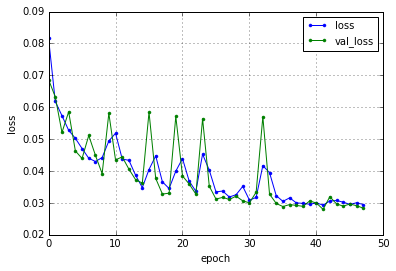

In [8]:
# loop windowWidth
for SampleNum,Overlap in zip(WindowWidth,OverlapArray):
    w=window.Window()
    w.SetData(Axis,dic[Axis])
    wind=w.Compile(windowWidth=SampleNum,overlapNum=Overlap)
    windoW=wind.reshape((len(wind),np.prod(wind.shape[1:])))
    
    for opt,optName in zip(optimizers,optimArray):
        print "hiden node = "+str(encoding_dim)
        CommonName='-edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap)+'-'+optName
        print CommonName
        SaveFileNameEncord=DataName+'_encoded'+CommonName
        SaveFileNameDecord=DataName+'_decoded'+CommonName
        SaveFileNameNet=DataName+'_net'+CommonName
        SaveFileNameTrain=DataName+'_train'+CommonName
        SaveFileNameTest=DataName+'_test'+CommonName
        SaveFileNameGlaph=GlaphDataPath+DataName+CommonName+'_loss_val_loss.png'

        window_test=windoW
        window_train=windoW
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTrain,window_test)
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTest,window_test)
        shapeNum=windoW.shape[1]

        # this is our input placeholder
        input_img = Input(shape=(shapeNum,))
        # "encoded" is the encoded representation of the input
        encoded = Dense(encoding_dim, activation='tanh')(input_img)
        # "decoded" is the lossy reconstruction of the input
        decoded = Dense(shapeNum, activation='linear')(encoded)

        # this model maps an input to its reconstruction
        autoencoder = Model(input=input_img, output=decoded)

        # this model maps an input to its encoded representation
        encoder = Model(input=input_img, output=encoded)

        # create a placeholder for an encoded (32-dimensional) input
        encoded_input = Input(shape=(encoding_dim,))
        # retrieve the last layer of the autoencoder model
        decoder_layer = autoencoder.layers[-1]
        # create the decoder model
        decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

        autoencoder.compile(optimizer=opt(), loss='mse')
        plot(autoencoder,  to_file=StudyDataModelPicPath+SaveFileNameNet+'.png')

        early_stopping = EarlyStopping(monitor='val_loss', patience=5)
        hist = autoencoder.fit(window_train, window_train,
                        nb_epoch=50,
                        verbose=2,
                        batch_size=32,
                        shuffle=True,
                        validation_data=(window_test, window_test),
                        callbacks=[early_stopping])
        time.sleep(0.1)
        encoded_imgs = encoder.predict(window_test)
        decoded_imgs = decoder.predict(encoded_imgs)

        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameEncord,encoded_imgs)
        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameDecord,decoded_imgs)

        # save model and wights
        json_string = encoder.to_json()
        open(StudyDataPath+SaveFileNameEncord+'.json', 'w').write(json_string)
        encoder.save_weights(StudyDataPath+SaveFileNameEncord+'_weights.h5',overwrite=True)

        json_string = decoder.to_json()
        open(StudyDataPath+SaveFileNameDecord+'.json', 'w').write(json_string)
        decoder.save_weights(StudyDataPath+SaveFileNameDecord+'_weights.h5',overwrite=True)

        json_string = autoencoder.to_json()
        open(StudyDataPath+SaveFileNameNet+'.json', 'w').write(json_string)
        autoencoder.save_weights(StudyDataPath+SaveFileNameNet+'_weights.h5',overwrite=True)

        # plot loss
        loss = hist.history['loss']
        val_loss = hist.history['val_loss']

        nb_epoch = len(loss)
        plt.plot(range(nb_epoch), loss, marker='.', label='loss')
        plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
        plt.legend(loc='best', fontsize=10)
        plt.grid()
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.savefig(SaveFileNameGlaph)
        plt.show()

In [9]:
print "finish"

finish
